# Parsing 4000 Rigol Waveforms

**Scott Prahl**

**Feb 2020**

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

try:
    import RigolWFM.wfme as wfme

except:
    print("***** You need to install the module to read Rigol files first *****")
    print("***** Execute the following line in a new cell, then retry     *****")
    print()
    print("!{sys.executable} -m pip install RigolWFM")

## Introduction

This notebook illustrates shows how to extract signals from a `.wfm` file from on the Rigol 4000 scope.  It also validates that the process works by comparing with `.csv` and screenshots.

Two different `.wfm` files are examined one for the DS4022 scope and one for the DS4024 scope.

The `.csv` files seem to have t=0 in the zero in the center of the waveform. 

## DS4022 Waveform

### Look at a screen shot

Start with a `.wfm` file from a Rigol DS4022 scope.  It should looks something like this

<img src="https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.png" width="70%">

### Look at the data in the `.csv` file

First let's look at plot of the data from the corresponding `.csv` file. 

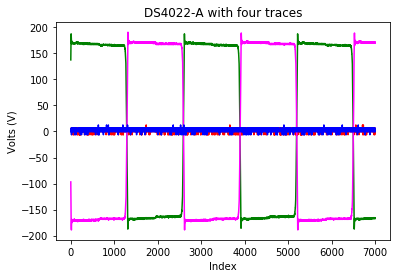

In [2]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.csv"

csv_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2).T

plt.plot(csv_data[1], color='green')
plt.plot(csv_data[2], color='red')
plt.plot(csv_data[3], color='magenta')
plt.plot(csv_data[4], color='blue')

plt.xlabel("Index")
plt.ylabel("Volts (V)")
plt.title("DS4022-A with four traces")
plt.show()

### Now for the `.wfm` data

First a textual description.

In [3]:
# raw=true is needed because this is a binary file
wfm_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.wfm" + "?raw=true"  

channels = wfme.read_and_parse_file(wfm_filename, kind='4000')

for ch in channels:
    print(ch)

working on https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4022-A.wfm?raw=true
downloading file
Channel 1
    Enabled:   True
    Voltage:
        Scale  = 50 V/div
        Offset = 0 V
    Time:
        Scale  = 1 µs/div
        Delay  = 500 ns
        Delta  = 2 ns/point
    Data:
        Points = 7000
        Raw    = [      215,      222,      227  ...        20,       20]
        Volts  = [  137.5 V,148.438 V, 156.25 V  ... -167.188 V,-167.188 V]
        Times  = [      0 s,     2 ns,     4 ns  ... 13.996 µs,13.998 µs]

Channel 2
    Enabled:   True
    Voltage:
        Scale  = 200 V/div
        Offset = 0 V
    Time:
        Scale  = 1 µs/div
        Delay  = 500 ns
        Delta  = 2 ns/point
    Data:
        Points = 7000
        Raw    = [      127,      127,      127  ...       127,      127]
        Volts  = [      0 V,      0 V,      0 V  ...       0 V,      0 V]
        Times  = [      0 s,     2 ns,     4 ns  ... 13.996 µs,13.998 µs]

Channel 3
    Enabled:   Tr

Now for the actual signal

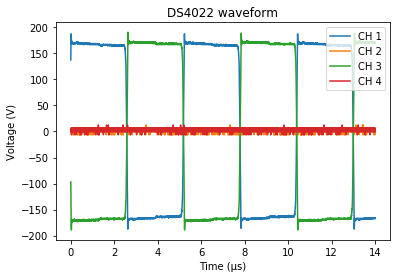

In [4]:
for ch in channels:
    name = 'CH %d'%ch.channel_number
    plt.plot(ch.times*1e6, ch.volts, label=name)

plt.xlabel("Time (µs)")
plt.ylabel("Voltage (V)")

plt.title("DS4022 waveform")
plt.legend()
plt.show()

## DS4024 Waveform

### Start with plotting the `.csv` data

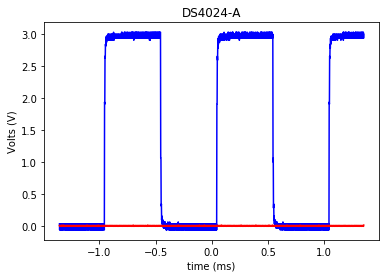

In [5]:
csv_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4024-A.csv"

csv_data = np.genfromtxt(csv_filename, delimiter=',', skip_header=2).T
time = csv_data[0] * 2.000000e-06 - 1.400000e-03

plt.plot(time*1000,csv_data[1], color='blue')
plt.plot(time*1000,csv_data[2], color='red')

plt.xlabel("time (ms)")
plt.ylabel("Volts (V)")
plt.title("DS4024-A")
plt.show()

### Now plot the `.wfm` data

In [6]:
# raw=true is needed because this is a binary file
wfm_filename = "https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4024-A.wfm" + "?raw=true"  

channels = wfme.read_and_parse_file(wfm_filename, kind='4000')

for ch in channels:
    print(ch)

working on https://github.com/scottprahl/RigolWFM/raw/master/wfm/DS4024-A.wfm?raw=true
downloading file
Channel 1
    Enabled:   True
    Voltage:
        Scale  = 1 V/div
        Offset = -576 mV
    Time:
        Scale  = 200 µs/div
        Delay  = 100 µs
        Delta  = 4 ns/point
    Data:
        Points = 700000
        Raw    = [      109,      109,      109  ...       205,      206]
        Volts  = [  13.5 mV,  13.5 mV,  13.5 mV  ...  3.0135 V,3.04475 V]
        Times  = [      0 s,     4 ns,     8 ns  ... 2.79999 ms,   2.8 ms]

Channel 2
    Enabled:   True
    Voltage:
        Scale  = 200 mV/div
        Offset = 0 V
    Time:
        Scale  = 200 µs/div
        Delay  = 100 µs
        Delta  = 4 ns/point
    Data:
        Points = 700000
        Raw    = [      126,      127,      127  ...       127,      127]
        Volts  = [ -6.25 mV,      0 V,      0 V  ...       0 V,      0 V]
        Times  = [      0 s,     4 ns,     8 ns  ... 2.79999 ms,   2.8 ms]



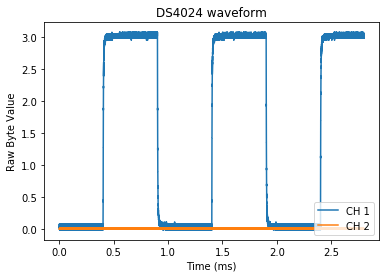

In [7]:
for ch in channels:
    name = 'CH %d'%ch.channel_number
    plt.plot(ch.times*1e3, ch.volts, label=name)

plt.xlabel("Time (ms)")
plt.ylabel("Raw Byte Value")

plt.title("DS4024 waveform")
plt.legend(loc="lower right")
plt.show()